In [ ]:
import tensorflow as tf
import keras

# **LOAD DATA**

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving csvTrainImages 13440x1024.csv to csvTrainImages 13440x1024.csv


In [ ]:
uploaded1 = files.upload()

Saving csvTrainLabel 13440x1.csv to csvTrainLabel 13440x1.csv


In [ ]:
uploaded2 = files.upload() 

Saving csvTestImages 3360x1024.csv to csvTestImages 3360x1024.csv


In [ ]:
uploaded3 = files.upload()

Saving csvTestLabel 3360x1.csv to csvTestLabel 3360x1.csv


In [ ]:
import pandas as pd 
trainx = pd.read_csv("csvTrainImages 13440x1024.csv",header=None)
trainy = pd.read_csv("csvTrainLabel 13440x1.csv",header=None)

testx = pd.read_csv("csvTestImages 3360x1024.csv",header=None)
testy = pd.read_csv("csvTestLabel 3360x1.csv",header=None)



In [ ]:
trainy = trainy.to_numpy()
trainx = trainx.to_numpy()
testx = testx.to_numpy()
testy = testy.to_numpy()



In [ ]:
trainx[2].shape

(1024,)

In [ ]:
trainx = trainx.reshape([-1, 32, 32, 1])

In [ ]:
testx = testx.reshape([-1,32, 32, 1])
import numpy as np
for i in range(13440):
  trainx[i]=np.rot90(trainx[i],3)
  trainx[i] = np.flip(trainx[i],axis=1)


for i in range(3360):
  testx[i]=np.rot90(testx[i],3)
  testx[i] = np.flip(testx[i],axis=1)

trainx.shape

(13440, 32, 32, 1)

# **Preprocessing Data :**

In [ ]:
trainx = trainx.astype('float32')
trainy = trainy.astype('int32')-1
testx = testx.astype('float32')
testy = testy.astype('int32')-1
# labels should be between 0 and 27 

(<matplotlib.image.AxesImage at 0x10baca48ba8>,
 <matplotlib.colorbar.Colorbar at 0x10baca845f8>)

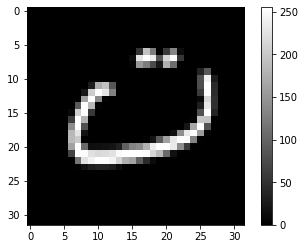

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
img= trainx[20]
img = img.reshape(32,32)
plt.imshow(img, cmap='gray'), plt.colorbar()

In [ ]:
trainx/=255
testx/=255

In [ ]:
from keras.utils import to_categorical
trainy = to_categorical(trainy)
testy = to_categorical(testy)

Using TensorFlow backend.
C:\Users\MOUAD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MOUAD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MOUAD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MOUAD\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [ ]:
trainy[10].shape

(28,)

# **Model Building**

In [ ]:
from keras import models
from keras import layers 
from keras.layers import Conv2D 
from keras.layers import Dense
from keras.layers import MaxPool2D
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers import BatchNormalization

In [ ]:

model2 = models.Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,1)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
model2.add(Dense(units = 256, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(28, activation = "softmax"))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [ ]:
from keras import optimizers
optimizer = optimizers.RMSprop(lr=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)
datagen.fit(trainx)

In [ ]:
history = model2.fit_generator(datagen.flow(trainx,trainy, batch_size=100),
                             epochs = 30, verbose = 2, steps_per_epoch=trainx.shape[0] // 100)


Epoch 1/30
 - 68s - loss: 2.1730 - acc: 0.3116
Epoch 2/30
 - 64s - loss: 1.3102 - acc: 0.5481
Epoch 3/30
 - 65s - loss: 0.9141 - acc: 0.6863
Epoch 4/30
 - 65s - loss: 0.6847 - acc: 0.7684
Epoch 5/30
 - 67s - loss: 0.5562 - acc: 0.8135
Epoch 6/30
 - 71s - loss: 0.4543 - acc: 0.8522
Epoch 7/30
 - 68s - loss: 0.3891 - acc: 0.8732
Epoch 8/30
 - 68s - loss: 0.3457 - acc: 0.8883
Epoch 9/30
 - 67s - loss: 0.3117 - acc: 0.9006
Epoch 10/30
 - 68s - loss: 0.2844 - acc: 0.9080
Epoch 11/30
 - 67s - loss: 0.2577 - acc: 0.9208
Epoch 12/30
 - 69s - loss: 0.2433 - acc: 0.9248
Epoch 13/30
 - 70s - loss: 0.2223 - acc: 0.9291
Epoch 14/30
 - 87s - loss: 0.1987 - acc: 0.9386
Epoch 15/30
 - 77s - loss: 0.1993 - acc: 0.9385
Epoch 16/30
 - 83s - loss: 0.1867 - acc: 0.9412
Epoch 17/30
 - 80s - loss: 0.1701 - acc: 0.9468
Epoch 18/30
 - 71s - loss: 0.1735 - acc: 0.9440
Epoch 19/30
 - 69s - loss: 0.1680 - acc: 0.9485
Epoch 20/30
 - 68s - loss: 0.1587 - acc: 0.9528
Epoch 21/30
 - 70s - loss: 0.1483 - acc: 0.9543
E

In [ ]:
test_loss, test_acc = model2.evaluate(testx, testy)

3360/3360 [==============================] - 6s 2ms/step


In [ ]:
print(test_acc)
print(test_loss)

0.9741071428571428
0.10268087903400772


In [ ]:
uploaded6 = files.upload()

Saving b.jpg to b (6).jpg


255.0


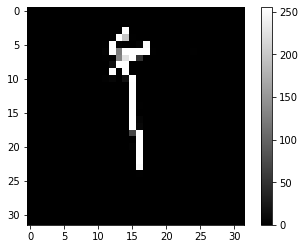

In [ ]:
from PIL import Image
img = Image.open("b.jpg").convert('L')
img=img.resize((32,32))
import numpy as np
from keras.preprocessing import image
img=255-image.img_to_array(img)

plt.imshow(img[...,0], cmap='gray'), plt.colorbar()
print(img.max())

In [ ]:
img = img/255
img = np.expand_dims(img,axis=0)
img.shape

(1, 32, 32, 1)

In [ ]:
p= model2.predict(img)
print(p)

[[1.0000000e+00 1.6247329e-16 5.2061947e-22 7.0684118e-21 1.3995925e-16
  4.0926591e-15 1.0300327e-15 3.0917017e-18 2.5539206e-15 2.3593622e-14
  1.5093720e-11 3.0987662e-23 3.0284057e-22 9.9187331e-24 4.3773998e-24
  2.7578268e-14 6.5336706e-14 3.9609245e-09 3.0553332e-10 1.1515176e-19
  1.1093545e-16 1.6182949e-22 5.2297663e-13 2.3334590e-10 6.0398166e-16
  8.2882546e-19 4.5959042e-15 9.0715090e-16]]


In [ ]:
max=np.argmax(p)
arabic_labels = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', ' د', 'ذ',
                'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 
                'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']
print(arabic_labels[max])
print(max)

أ
0


In [ ]:
model2.save('arabic_alphabet_98.h5')